# MLF HW1

## Import libs

In [18]:
import warnings

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from Ref.ch03 import plot_decision_regions

## Loading data & fill missing values

In [19]:
data = pd.read_csv("Data/cs-training.csv", index_col=0)

y_feature = "SeriousDlqin2yrs"
X_features = list(data.columns)
X_features.remove(y_feature)

data[X_features] = data[X_features].fillna(data[X_features].mean())
data_train = data.dropna(subset=y_feature)
data.describe()

X = data[X_features]
y = data[y_feature]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## Fit LR with different C

In [20]:
weights, params = [], []
for c in np.arange(-8, 5):
    lr = LogisticRegression(C=10.**c, random_state=42,
                            solver='liblinear',
                            multi_class='ovr',
                            penalty="l1")
    lr.fit(X_train, y_train)
    weights.append(lr.coef_)
    params.append(10.**c)
weights = np.array(weights)[:, 0, :]

## Plot weight with different C

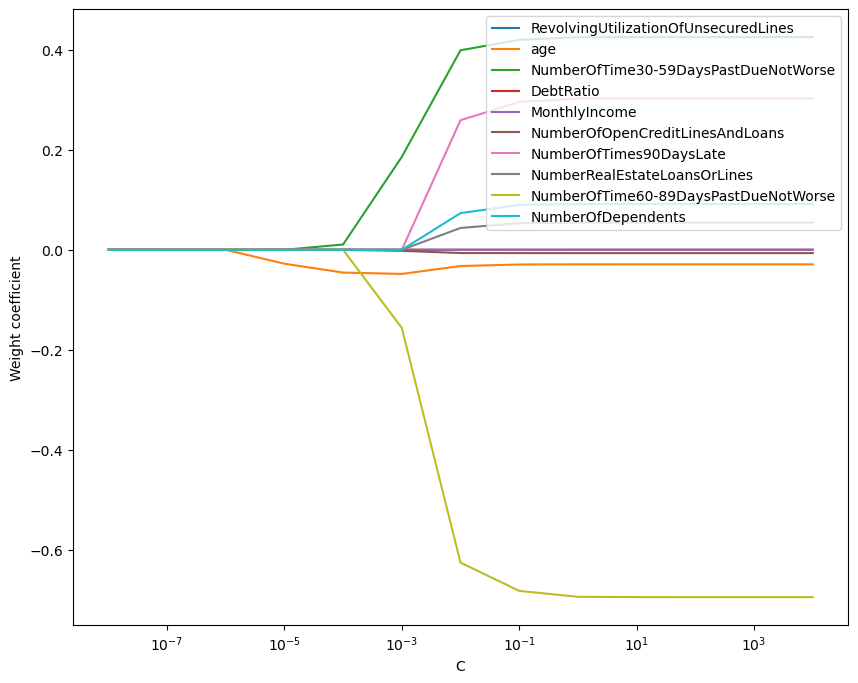

In [21]:
plt.figure(figsize=(10, 8))
for feat_num in range(len(X_features)):
    plt.plot(params, weights[:, feat_num],
             label=X_features[feat_num])

plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper right')
plt.xscale('log')
plt.show()

## Get 2 most important features

In [22]:
select_num = 2
min_abs_weight = 1e-3
sorted_indices = None
for row_num in range(weights.shape[0]):
    if (np.nansum(abs(weights[row_num]) > min_abs_weight)) >= select_num:
        sorted_indices = np.argsort(abs(weights[row_num]))[-select_num:]
        break
if sorted_indices is None:
    raise Exception("No features selected.")
selected_features = [X_features[i] for i in sorted_indices]
print("Top 2 features selected:", [x for x in selected_features])

Top 2 features selected: ['NumberOfTime30-59DaysPastDueNotWorse', 'age']


### Fitting LR with selected features

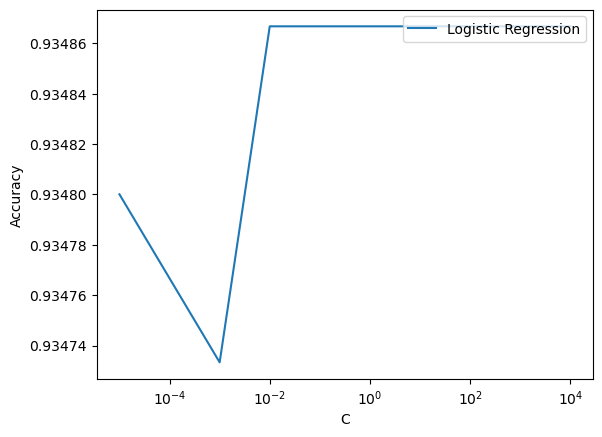

Decision Regions with C=1.0:


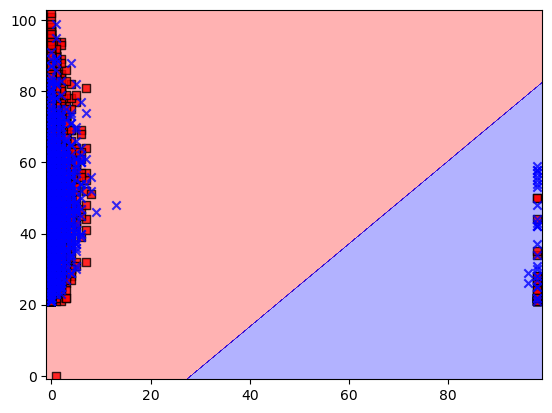

In [23]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

C_list = [10.**c for c in range(-5, 5)]
lr_acc_list = []
lr_model_list= [LogisticRegression(C=c, random_state=42,
                            solver='liblinear',
                            multi_class='ovr',
                            penalty="l1").fit(X_train_selected, y_train) for c in C_list]
for model in lr_model_list:
    y_pred = model.predict(X_test_selected)
    rpt = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    lr_acc_list.append(rpt["accuracy"])
    
plt.plot(C_list, lr_acc_list,
             label="Logistic Regression")

plt.ylabel('Accuracy')
plt.xlabel('C')
plt.legend(loc='upper right')
plt.xscale('log')
plt.show()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    print("Decision Regions with C=1.0:")
    plot_decision_regions(X=X_test_selected, y=y_test, classifier=lr_model_list[C_list.index(1.0)])

### Fitting SVM with selected features

In [24]:
C_list = [10.**c for c in range(-5, 2)]
svm_acc_list = []
svm_model_list= [SVC(C=c, random_state=42) for c in C_list]
for model in svm_model_list:
    print(model)
    model.fit(X_train_selected, y_train)

for model in svm_model_list:
    y_pred = model.predict(X_test_selected)
    rpt = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    svm_acc_list.append(rpt["accuracy"])


SVC(C=1e-05, random_state=42)
SVC(C=0.0001, random_state=42)
SVC(C=0.001, random_state=42)
SVC(C=0.01, random_state=42)
SVC(C=0.1, random_state=42)
SVC(random_state=42)
SVC(C=10.0, random_state=42)


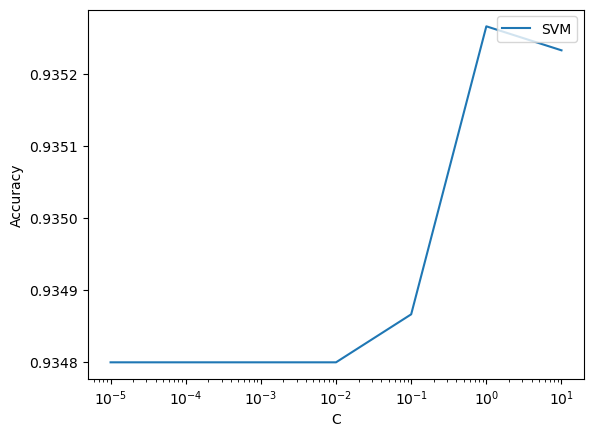

In [25]:
plt.plot(C_list, svm_acc_list,
             label="SVM")

plt.ylabel('Accuracy')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper right')
plt.show()

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    print("Decision Regions:")


    plot_decision_regions(X=X_test_selected, y=y_test, classifier=svm_model_list[-2], test_idx=range(0, 100))

Decision Regions:


### Fitting DecisionTree with selected features

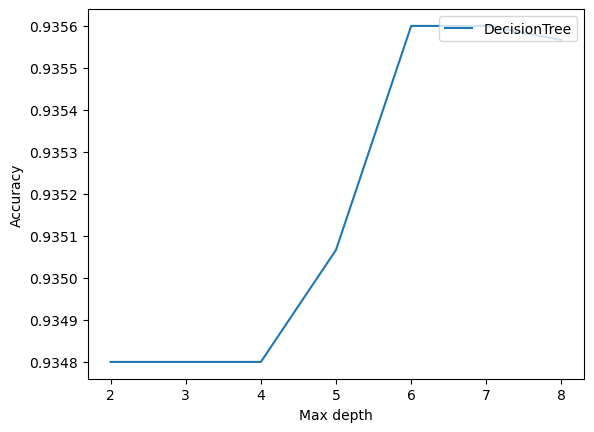

Decision Regions:


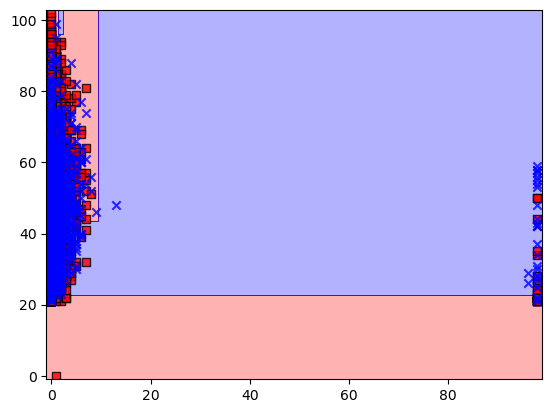

In [27]:
depth_list = [d for d in range(2, 9)]
dt_acc_list = []
dt_model_list= [DecisionTreeClassifier(max_depth=d, random_state=42) for d in depth_list]
for model in dt_model_list:
    model.fit(X_train_selected, y_train)

for model in dt_model_list:
    y_pred = model.predict(X_test_selected)
    rpt = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    dt_acc_list.append(rpt["accuracy"])

plt.plot(depth_list, dt_acc_list,
             label="DecisionTree")

plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.legend(loc='upper right')
plt.show()

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    print("Decision Regions:")
    plot_decision_regions(X=X_test_selected, y=y_test, classifier=dt_model_list[4])